<center><h1>Khatri_Surbhi_HW5</h1></center>
<br>
<br>

Name: Surbhi Khatri
<br>
Github Username: surbhikhatri
<br>
USC ID: 9893833133

## 1. Decision Trees as Interpretable Models

Import packages

In [139]:
import pandas as pd
from sklearn import tree
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from skmultilearn.problem_transform import LabelPowerset
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import xgboost as xgb
warnings.filterwarnings("ignore")

### (a) Obtain Data

Get the Accute Inamations Data Set

In [140]:
df = pd.read_csv("./../data/Homework5Data/diagnosis.data", sep='\s+', header=None, encoding="utf-16", decimal=',')
for i in range(1, 8):
    df[i] = [1 if item == "yes" else 0 for item in df[i]]

df.columns = ["Temperature of patient", "Nausea", "Lumbar pain", "Urine pushing", "Micturition pains","Burning", "Urinary bladder Inflammation", "Nephritis"]
# print(df)

### (b) Build a decision tree

[Text(0.4, 0.9, 'x[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'x[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.6, 0.7, 'x[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

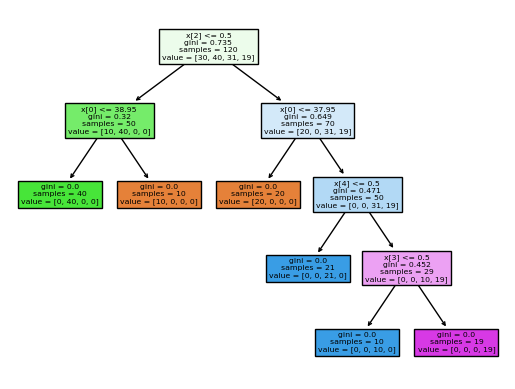

In [141]:
labelSet = LabelPowerset()
# decision for Urinary bladder Inflammation and Nephritis -> converting into multi class datatset
y_transformed = labelSet.transform(df.loc[:, ["Urinary bladder Inflammation", "Nephritis"]])
# print(df.loc[110:, ["Urinary bladder Inflammation", "Nephritis"]])
# print(y_transformed)
# neither -> 0, only bladder -> 1, only Nep -> 2, both -> 3

classifier = tree.DecisionTreeClassifier(random_state=0)
classifier = classifier.fit(df.loc[:, :"Burning"], y_transformed)
tree.plot_tree(classifier, filled=True)

### (c) Convert the decision rules

In [142]:
# using code from provided link in the assignment description
rules = tree.export_text(classifier)
# print(rules)

def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode

	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)
tree_to_pseudo(classifier, df.columns)

 if ( Lumbar pain <= 0.5 ) {
   if ( Temperature of patient <= 38.95000076293945 ) {
     return [[ 0. 40.  0.  0.]]
   } else {
     return [[10.  0.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( Micturition pains <= 0.5 ) {
       return [[ 0.  0. 21.  0.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[ 0.  0. 10.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


# (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision

[0.         0.04908333 0.07947222 0.11111111 0.20423611]


[Text(0.4, 0.9, 'x[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.6, 0.7, 'x[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

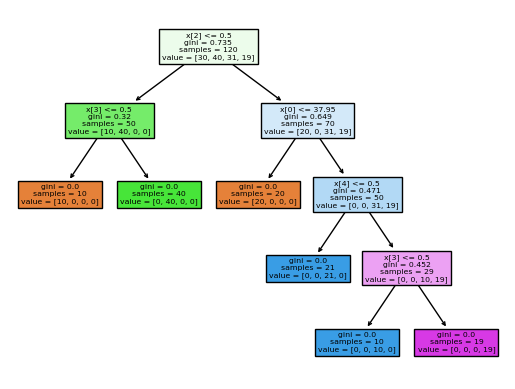

In [143]:
path = classifier.cost_complexity_pruning_path(df.loc[:, :"Burning"], df.loc[:, ["Urinary bladder Inflammation", "Nephritis"]])
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

cv_scores = []
for alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = np.mean(cross_val_score(clf, df.loc[:, :"Burning"], y_transformed, cv=5))
    cv_scores.append(score)

best_alpha = ccp_alphas[np.argmax(cv_scores)]
clf = tree.DecisionTreeClassifier(ccp_alpha=best_alpha)
clf = clf.fit(df.loc[:, :"Burning"], y_transformed)
tree.plot_tree(clf, filled=True)
